<a href="https://colab.research.google.com/github/brenoslivio/CompVis_ICMC/blob/main/Aula_01/Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 - Processamento de Dados

**SCC0252 - Visualização Computacional (2022/2)**

Monitor:    Breno Lívio Silva de Almeida, brenoslivio@usp.br

Docente:    Maria Cristina Ferreira de Oliveira, cristina@icmc.usp.br

Material base de Eric Macedo Cabral.

---

## Motivação

- Uso de linguagens como Python e R para visualização de dados:

    - Disponibilidade de uma gama de bibliotecas de visualização para se utilizar;

    - Reprodutibilidade;

    - Ferramentas *open-source*;

    - Também contam com integração para ferramentas de *Business Intelligence*.

- Com o fenômeno do *Big Data* se torna cada vez mais imprescindível o uso de técnicas de visualização para gerar *insights* em relação aos dados;

- O processamento adequado dos dados antes da visualização se dá por motivos como:
Ruídos nos dados (valores nulos, discrepantes e etc.);

    - Variáveis em escalas diferentes;
    
    - Grande número de variáveis (alta dimensionalidade).

---

## Usando o Jupyter

![](https://jupyter.org/assets/logos/rectanglelogo-greytext-orangebody-greymoons.svg)

### Plataforma Jupyter

- Sobretudo, a plataforma Jupyter funciona como uma aplicação web;

- Suas principais componentes são:

    - Documento no formato Jupyter Notebook (*.ipynb);

    - Protocolo de computação interativa;

    - O Kernel.

- Além do Jupyter Notebook padrão, temos o JupyterLab, um ambiente mais pensado para a manipulação de vários Notebooks e outros arquivos ao mesmo tempo.

### Setup

- Para usar o Jupyter com diversas bibliotecas do Python, podemos ter a opção **On-line** de usar:

    - [Google Colab](http://colab.research.google.com);

    - [Binder](http://mybinder.org), com alguns exemplos para começar em [Try Jupyter](http://jupyter.org/try).

- O Colab, por exemplo, já conta com diversas bibliotecas que iremos usar na disciplina.

- Para uso **local** do Jupyter:

    - Package Installer for Python (pip)

    - Conda;

    - [Imagem](https://hub.docker.com/r/jupyter/datascience-notebook) do Docker;
    
    - Visual Studio Code com extensão para o Jupyter.

- Usar [ambientes virtuais](https://janakiev.com/blog/jupyter-virtual-envs/) para isolar ambientes de trabalho com o pip e conda;

- Instalar com **pip**: pip install biblioteca;
- Instalar com **conda**: conda install -c CANAL biblioteca.

---

## Coleta de dados

### Bibliotecas

- Em algumas bibliotecas já existem conjuntos de dados prontos, geralmente usados para demonstrações:

[Seaborn](https://github.com/mwaskom/seaborn-data):

```python
import seaborn as sns
sns.load_dataset(dataset)
```

[Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html):

```python
from sklearn.datasets import dataset
```

[Plotly](https://plotly.com/python-api-reference/generated/plotly.express.data.html):

```python
import plotly.express as px 
df = px.data.iris()
```

Carregando o dataset [tips](https://rdrr.io/cran/reshape2/man/tips.html) do Seaborn:

In [ ]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Arquivos locais/remotos

- Pandas é uma das ferramentas mais conhecidas para manipulação e análise de dados em Python.

Documentação do Pandas: https://pandas.pydata.org/docs/index.html

Documentação sobre Input/Output: https://pandas.pydata.org/docs/reference/io.html

```python
import pandas as pd
    
pd.read_csv('data/arquivo.csv', sep = ',')
pd.read_sql('test_data', 'postgres:///db_name')
pd.read_html('https://en.wikipedia.org/wolo/Minnesota')
```

Podemos ler um arquivo CSV diretamente pela página que ele estiver hospedado:

In [ ]:
import pandas as pd

pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Carregando as tabelas encontradas na página do Wikipédia:

In [ ]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')

table_MN[2] # Terceira tabela encontrada

,Location,July (°F),July (°C),January (°F),January (°C)
0,Minneapolis,83/64,28/18,23/7,−4/−13
1,Saint Paul,83/63,28/17,23/6,−5/−14
2,Rochester,82/63,28/17,23/3,−5/−16
3,Duluth,76/55,24/13,19/1,−7/−17
4,St. Cloud,81/58,27/14,18/−1,−7/−18
5,Mankato,86/62,30/16,23/3,−5/−16
6,International Falls,77/52,25/11,15/−6,−9/−21


---

## Gerenciamento e manipulação

### Pandas DataFrame

- Matriz bidimensional de dados rotulados por linhas e colunas

- Suporta dados heterogêneos

- Pode ser vista como um dicionário de `pd.Series`
 
    - A estrutura de dados sequencial base do Pandas

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]), columns = ['a', 'b', 'c'])

df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


- `pd.DataFrame.shape`: a dimensionalidade do Dataframe

- `pd.DataFrame.head(n)`: n primeiras instâncias

- `pd.DataFrame.tail(n)`: n últimas instâncias

- `pd.DataFrame.sample(n)`: n amostras aleatórias

- `pd.DataFrame.values`: representação np.ndarray do Dataframe

Com o dataset `tips` carregado anteriormente temos, por exemplo:

In [ ]:
tips.shape

(244, 7)

In [ ]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
34,17.78,3.27,Male,No,Sat,Dinner,2
223,15.98,3.00,Female,No,Fri,Lunch,3
21,20.29,2.75,Female,No,Sat,Dinner,2
137,14.15,2.00,Female,No,Thur,Lunch,2
14,14.83,3.02,Female,No,Sun,Dinner,2


In [ ]:
tips.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

### Seleção de dados

- Seleção simples de colunas:

```python
pd.DataFrame['col_label']
```

- Seleção de múltiplas colunas:

```python
pd.DataFrame[['col_label_1', 'col_label_2']]
```

- Seleção por correspondência de índice (*hashing*):

```python
pd.DataFrame.loc[['row_labels'], ['column_labels']]
```

- Seleção por posição sequencial (lista ordenada):

```python
pd.DataFrame.iloc[['row_indexes'], ['col_indexes']]
```

- Análogo ao `loc`, mas lida apenas com único valor por vez:

```python
pd.DataFrame.at['row_label', 'col_label']
```

- Análogo ao `iloc`, mas lida apenas com único valor por vez:

```python
pd.DataFrame.iat['row_index', 'col_index']
```

Obs.: A implementação do `at` e `iat` é mais eficiente do que a com os correspondentes `loc` e `iloc`.

In [ ]:
tips[['total_bill', 'tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [ ]:
tips.loc[:, ["smoker"]].head()

,smoker
0,No
1,No
2,No
3,No
4,No


In [ ]:
tips.iloc[::2, [3]].head()

,smoker
0,No
2,No
4,No
6,No
8,No


In [ ]:
tips.at[0, 'smoker']

'No'

In [ ]:
tips.iat[2, 2]

'Male'

- Operadores condicionais:

    - Negação: **~**

    - E lógico: **&**

    - OU lógico: **|**

- Seleção por condicional simples: 

```python
pd.DataFrame[condicional]
```

- Seleção por múltiplas condicionais: 

```python
pd.DataFrame[(condicional_1) | (condicional_2)]
```

In [ ]:
tips[tips["smoker"] == "No"].sample(5)

,total_bill,tip,sex,smoker,day,time,size
154,19.77,2.00,Male,No,Sun,Dinner,4
148,9.78,1.73,Male,No,Thur,Lunch,2
32,15.06,3.00,Female,No,Sat,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
195,7.56,1.44,Male,No,Thur,Lunch,2


In [ ]:
tips[(tips["smoker"] == "No") & (tips["sex"] == "Female")].sample(5)

,total_bill,tip,sex,smoker,day,time,size
144,16.43,2.30,Female,No,Thur,Lunch,2
0,16.99,1.01,Female,No,Sun,Dinner,2
14,14.83,3.02,Female,No,Sun,Dinner,2
136,10.33,2.00,Female,No,Thur,Lunch,2
104,20.92,4.08,Female,No,Sat,Dinner,2


### Agrupamento

- Agrupar dados por coluna:

```python
pd.DataFrame.groupby(['column_label'])
```

In [ ]:
tips.groupby(['time', 'sex']).mean()

total_bill       tip      size
time   sex                                   
Lunch  Male     18.048485  2.882121  2.363636
       Female   16.339143  2.582857  2.457143
Dinner Male     21.461452  3.144839  2.701613
       Female   19.213077  3.002115  2.461538

### Funções 

- Funções agregadas:

```python
pd.DataFrame.agg([func])
```

In [ ]:
tips.agg([np.mean, np.std])

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100


- *Broadcasting*:

```python
pd.DataFrame.apply([func])
```

pd.DataFrame['numeric_col'] * 2

In [ ]:
tips['total_bill'].apply(lambda x : x * 2).head()

0    33.98
1    20.68
2    42.02
3    47.36
4    49.18
Name: total_bill, dtype: float64

In [ ]:
(tips['total_bill'] * 2).head()

0    33.98
1    20.68
2    42.02
3    47.36
4    49.18
Name: total_bill, dtype: float64

---

## Processamento e transformações

- Qual o domínio do seu conjunto de dados?

    - Que tipo de tratamento esse conjunto de dados deve receber

- Como seus dados estão estruturados?

- Existem metadados?

- Existem valores ausentes?

    - Como tratá-los sem causar ruídos?

- Existem anômalos?

- Existem atributos correlacionados ou redundantes?

### Sumarização

- Medidas estatísticas:

    - Média

    - Desvio padrão

    - Mediana

- Recursos visuais:

    - Boxplot

    - Histograma

    - WordCloud (dados textuais)

No Pandas temos:

- `pd.DataFrame.min()`: Valor mínimo
- `pd.DataFrame.max()`: Valor máximo
- `pd.DataFrame.mean()`: Média
- `pd.DataFrame.median()`: Mediana
- `pd.DataFrame.std(ddof = 1)`: Desvio padrão (atenção aos Graus de Liberdade)
- `pd.DataFrame.mode()`: Moda
- `pd.DataFrame.describe()`: Estatísticas descritivas sobre o dataset

Como sempre, recomendado olhar a [documentação](https://pandas.pydata.org/docs/reference/frame.html) do Pandas DataFrame para maiores detalhes.

Vamos carregar os dados da Iris pelo scikit-learn. Os dados são de um tipo de array específico da biblioteca, que possui métodos análogos ao do Pandas.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)

iris_X = iris.data
iris_Y = iris.target

iris_statistics = pd.DataFrame(data={
    "Min": iris_X.min(),
    "Max": iris_X.max(),
    "Mean": iris_X.mean(),
    "Median": iris_X.median(),
    "Std. Dev.": iris_X.std()
}, index=iris_X.columns)

iris_statistics

,Min,Max,Mean,Median,Std. Dev.
sepal length (cm),4.3,7.9,5.843333,5.80,0.828066
sepal width (cm),2.0,4.4,3.057333,3.00,0.435866
petal length (cm),1.0,6.9,3.758000,4.35,1.765298
petal width (cm),0.1,2.5,1.199333,1.30,0.762238


Para trabalhar em Pandas DataFrame podemos fazer o seguinte:

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vendo a distribuição para os rótulos da Iris:

In [ ]:
iris_Y_statistics = iris_Y.value_counts(normalize=True)
iris_Y_statistics.index = [
    iris.target_names[i] for i in iris_Y_statistics.index]

iris_Y_statistics

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: target, dtype: float64

Boxplot para os dados da Iris:

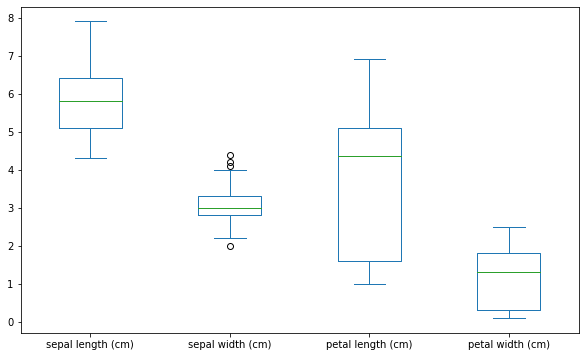

In [ ]:
iris_X.plot.box(figsize=(10, 6));

### Dados ausentes

- Descarta linhas com valores ausentes

```python
pd.DataFrame.dropna()
```

Valor sentinela e imputação por média

```python
pd.DataFrame.fillna()
```

- Imputação por interpolação

```python
pd.DataFrame.interpolate()
```

- Imputação por vizinhos mais próximos

```python
from sklearn.impute import KNNImputer
```

Mais sobre imputação em [Scikit-learn - Impute](https://scikit-learn.org/stable/modules/impute.html).

Vamos trabalhar com o dataset [Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), primeiro colocando 10% de valores:

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes(as_frame=True)
diabetes_X = diabetes.data

np.random.seed(1) # Mantendo números aleatórios como previsíveis

diabetes_X_null = diabetes_X.mask(np.random.random(diabetes_X.shape) < .1) # 10% dos dados como nulos

diabetes_X_null.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,NaN,0.021872,-0.044223,NaN,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,NaN,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,NaN,NaN,0.002864,-0.025930
3,NaN,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,NaN,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Checar se há pelo menos um valor nulo em cada coluna:

In [ ]:
diabetes_X_null.isnull().any()

age    True
sex    True
bmi    True
bp     True
s1     True
s2     True
s3     True
s4     True
s5     True
s6     True
dtype: bool

Removendo as linhas com campos nulos:

In [ ]:
diabetes_X_null.dropna(inplace = True) # inplace garante a mudança diretamente no DataFrame

diabetes_X_null.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504


Carregando os mesmos dados nulos para preencher NaN com "NULO":

In [ ]:
np.random.seed(1) # Mantendo números aleatórios como previsíveis

diabetes_X_null = diabetes_X.mask(np.random.random(diabetes_X.shape) < .1) # 10% dos dados como nulos

diabetes_X_null.fillna("NULL").head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.05068,NULL,0.021872,-0.044223,NULL,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,NULL,-0.019163,0.074412,-0.039493,-0.06833,-0.092204
2,0.085299,0.05068,0.044451,-0.005671,-0.045599,-0.034194,NULL,NULL,0.002864,-0.02593
3,NULL,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,NULL,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Podemos usar métodos de interpolação para preencher os valores NaN:

In [ ]:
diabetes_X_null.interpolate(method="linear").head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,NaN,0.021872,-0.044223,NaN,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.044911,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,0.019187,-0.002592,0.002864,-0.025930
3,0.045341,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,-0.014564,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Imputação usando o algoritmo k-nearest neighbors (k-NN):

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
diabetes_X_null_knn = diabetes_X_null.copy(deep=True)
diabetes_X_null_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_X_null) # Coloca em um Pandas DataFrame de volta

diabetes_X_null_knn.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.007159,0.021872,-0.044223,-0.019101,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.013402,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.016157,-0.002592,0.002864,-0.025930
3,-0.018592,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.002217,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Escalonamento

- Trazer os dados para a mesma ordem de grandeza

- Modiﬁca os valores originais

**Uniformização (*z-score*)**

- *Standardization*

- Média = 0

- Desvio padrão = 1

Temos:

$$Z = \frac{x - \mu}{\sigma}$$

```python
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
```

ou 

```python
from scipy.stats import zscore
pd.DataFrame.apply(zscore)
```

In [ ]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(diabetes_X), columns= diabetes_X.columns)

print('Média:\n {},\n\nDesvio Padrão:\n {}'.format(X_scaled.mean(), X_scaled.std()))

Média:
 age   -3.215126e-17
sex   -6.430251e-17
bmi   -4.420798e-17
bp     8.037814e-18
s1     2.411344e-17
s2    -2.009453e-17
s3     2.411344e-17
s4    -2.411344e-17
s5     0.000000e+00
s6    -3.215126e-17
dtype: float64,

Desvio Padrão:
 age    1.001133
sex    1.001133
bmi    1.001133
bp     1.001133
s1     1.001133
s2     1.001133
s3     1.001133
s4     1.001133
s5     1.001133
s6     1.001133
dtype: float64


**Mínimo e máximo**

- Leva os dados para um novo intervalo
- Deﬁnição de mínimo e máximo

Temos:

$$X\_mm = \left(\frac{x - x_{min}}{x_{max} - x_{min}}\right) * (max - min) + min$$

```python
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
```

In [ ]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(diabetes_X), columns= diabetes_X.columns)

(diabetes_X_min_max_scaler := diabetes_X.copy(deep=True)
    ).iloc[:,:] = preprocessing.MinMaxScaler().fit_transform(diabetes_X) # [0, 1]

diabetes_X_min_max_scaler.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333


**Normalização (l¹, l²)**

- Escalona as instâncias para a norma unitária

    - É executado linha a linha

- Geralmente usado para regularização de modelos de Aprendizado de Máquina

- Ambos têm vantagens e desvantagens


```python
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_norm = normalizer.fit_transform(X)
```

In [ ]:
from scipy.spatial.distance import cosine
from sklearn.preprocessing import normalize

(diabetes_X_norm := diabetes_X.copy(deep=True)
    ).iloc[:,:] = normalize(diabetes_X, norm="l2")

print("Distância do Cosseno (Dados originais): {}".format(cosine(diabetes_X.iloc[0], diabetes_X.iloc[1])))
print("Distância do Cosseno (Após normalizar): {}".format(cosine(diabetes_X_norm.iloc[0], diabetes_X_norm.iloc[1])))

Distância do Cosseno (Dados originais): 1.4129662155625995
Distância do Cosseno (Após normalizar): 1.4129662155625995


### Detecção de outliers

**Outlier** é uma instância de dado signiﬁcativamente distante das demais instâncias ([Wikipédia](https://en.wikipedia.org/wiki/Outlier)).

- Visualização

    - Scatter plot

    - Boxplot

- Z-score

- Distância Interquartil (IQR)

    - A diferença entre o quartil superior e o quartil inferior (Q3 - Q1)

    - É uma medida de dispersão robusta contra outliers

![](http://www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png)

Fonte da Imagem: [Statplace](https://statplace.com.br/blog/como-interpretar-um-boxplot/)

Para Z-score, alguns casos podemos considerar quando uma observação tem:

$$\text{Z-score < -3} \vee \text{Z-score} > 3$$

Isto é, está abaixo ou acima de 3 desvios padrão (3σ), que corresponde a ~99.7% das observações. Mais informações a respeito em [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Temos a IQR dado por:

$$IQR = Q_3 - Q_1$$

Sendo que:

$$outliers = x_i\;<\;(Q_1 - k.IQR)\;\vee\;x_i\;>\;(Q_3 + k.IQR)$$

Com k, geralmente sendo considerado como k = 1.5.

Considerando a ideia da IQR, podemos encontrar outliers no dataset de Diabetes:

Número de outliers encontrados: 33



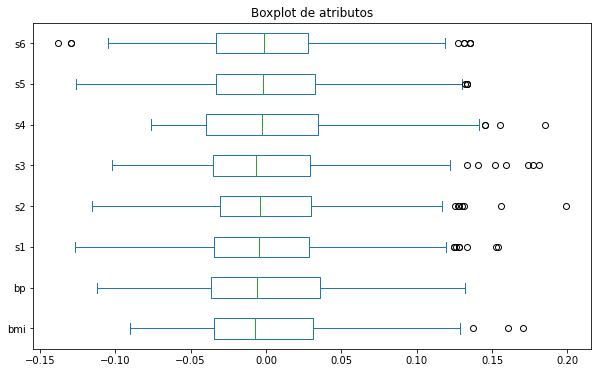

In [ ]:
diabetes_X_select = diabetes_X.drop(["age", "sex"], axis="columns")

factor = 1.5
Q1 = diabetes_X_select.quantile(0.25)
Q3 = diabetes_X_select.quantile(0.75)
IQR = Q3 - Q1

lower_range = Q1 - (factor * IQR)
upper_range = Q3 + (factor * IQR)

diabetes_X_outliers = (
    (diabetes_X_select < lower_range) | 
    (diabetes_X_select > upper_range)
).any(axis="columns")

print("Número de outliers encontrados: {}\n".format(diabetes_X_outliers.sum()))

diabetes_X_select.plot.box(
    vert=False,
    title="Boxplot de atributos", figsize=(10, 6));

Para lidar com um Scatter plot no caso desse dataset, precisamos representar os dados em 2 ou 3 dimensões. Para isso podemos técnicas de redução de dimensionalidade como a *Principal Component Analysis* (PCA). Com duas primeiras componentes geradas temos o seguinte:

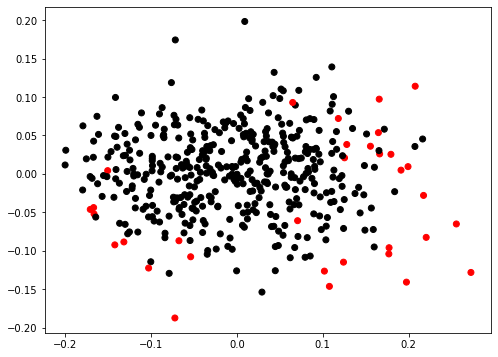

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

diabetes_X_pca = PCA(n_components=2).fit_transform(diabetes_X_select)

plt.figure(figsize=(8, 6))

plt.scatter(
    x=diabetes_X_pca[:,0], y=diabetes_X_pca[:,1],
    c=["red" if i else "black" for i in diabetes_X_outliers])

plt.show()

### Redução de dimensionalidade

**Principal Component Analysis (PCA)**

- Encontrar combinações lineares chamadas de componentes principais

    - Capturar variância nos dados

- O primeiro componente tem maior variância

- Os demais são ortogonais ao anterior e apresentam variância decrescente

**t-distributed Stochastic Neighbor Embedding (t-SNE)**

- Otimização da dissimilaridade entre o espaço projetado e o espaço original

- Sensível a estruturas locais (vizinhanças de dados)

    - Útil para capturar informações de grupos (clusters)

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

**Uniform Manifold Approximation and Projection (UMAP)**

- Técnica estado-da-arte de redução de dimensionalidade mais recente (2018)

- Competitivo com o t-SNE em questão de velocidade

- UMAP proporciona um melhor equilíbrio entre a estrutura local e global, o que, em geral, proporciona uma apresentação mais precisa da estrutura global

Vamos carregar o dataset de vinhos [Wine](https://scikit-learn.org/stable/datasets/index.html#wine-dataset) para a análise com redução de dimensionalidade:

In [ ]:
from sklearn.datasets import load_wine

wine_X, wine_Y = load_wine(as_frame=True, return_X_y=True)
wine_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Vamos fazer um comparativo usando PCA diretamente, e com métodos de padronização e normalização antes:

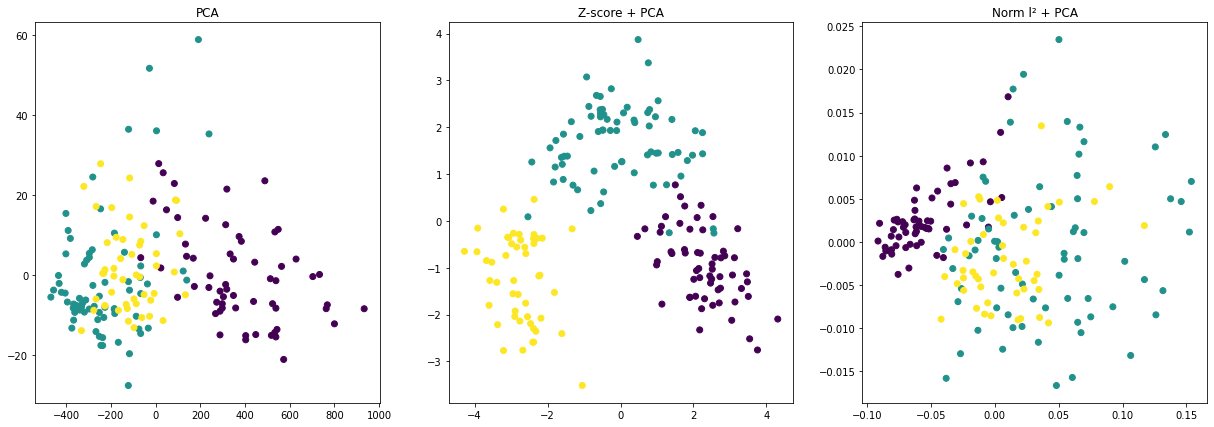

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

# PCA
wine_pca = PCA(n_components=2).fit_transform(wine_X)

# z-score + PCA
wine_pca_std = make_pipeline(
    StandardScaler(),
    PCA(n_components=2)).fit_transform(wine_X)

# l2 norm + PCA
wine_pca_norm = make_pipeline(
    Normalizer(norm="l2"),
    PCA(n_components=2)).fit_transform(wine_X)

wine_fig, wine_axs = plt.subplots(1, 3)
wine_fig.set_figwidth(21)
wine_fig.set_figheight(7)

wine_axs[0].scatter(
    x=wine_pca[:,0], y=wine_pca[:,1],c=wine_Y
)
wine_axs[0].set_title("PCA")

wine_axs[1].scatter(
    x=wine_pca_std[:,0],
    y=wine_pca_std[:,1],
    c=wine_Y
)
wine_axs[1].set_title("Z-score + PCA")

wine_axs[2].scatter(
    x=wine_pca_norm[:,0],
    y=wine_pca_norm[:,1],
    c=wine_Y
)
wine_axs[2].set_title("Norm l² + PCA")

plt.show()

Fazemos o mesmo para t-SNE:

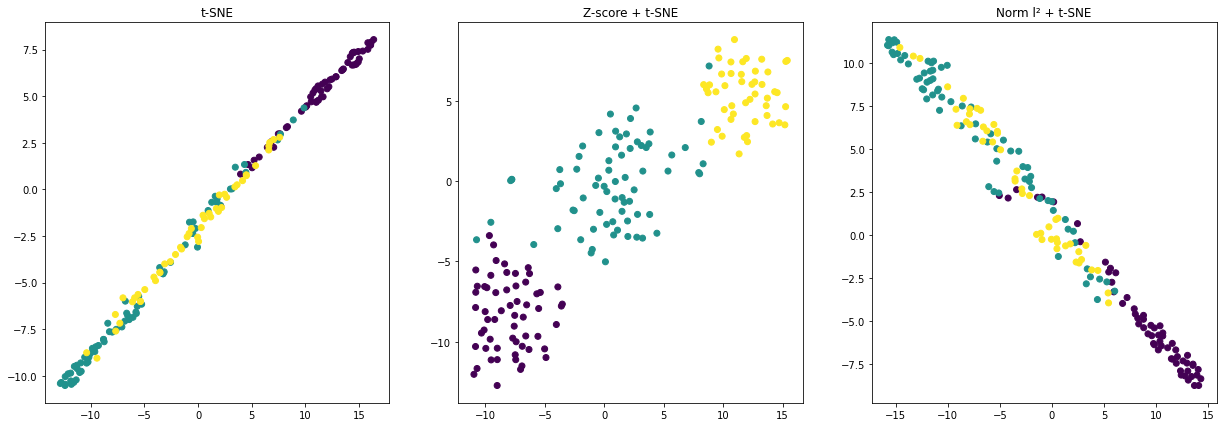

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings("ignore")

# t-SNE
wine_tsne = TSNE(n_components=2).fit_transform(wine_X)

# z-score + t-SNE
wine_tsne_std = make_pipeline(
    StandardScaler(),
    TSNE(n_components=2)).fit_transform(wine_X)

# l2 norm + t-SNE
wine_tsne_norm = make_pipeline(
    Normalizer(norm="l2"),
    TSNE(n_components=2)).fit_transform(wine_X)

wine_fig, wine_axs = plt.subplots(1, 3)
wine_fig.set_figwidth(21)
wine_fig.set_figheight(7)

wine_axs[0].scatter(
    x=wine_tsne[:,0], y=wine_tsne[:,1],c=wine_Y
)
wine_axs[0].set_title("t-SNE")

wine_axs[1].scatter(
    x=wine_tsne_std[:,0],
    y=wine_tsne_std[:,1],
    c=wine_Y
)
wine_axs[1].set_title("Z-score + t-SNE")

wine_axs[2].scatter(
    x=wine_tsne_norm[:,0],
    y=wine_tsne_norm[:,1],
    c=wine_Y
)
wine_axs[2].set_title("Norm l² + t-SNE")

plt.show()

Para o UMAP temos:

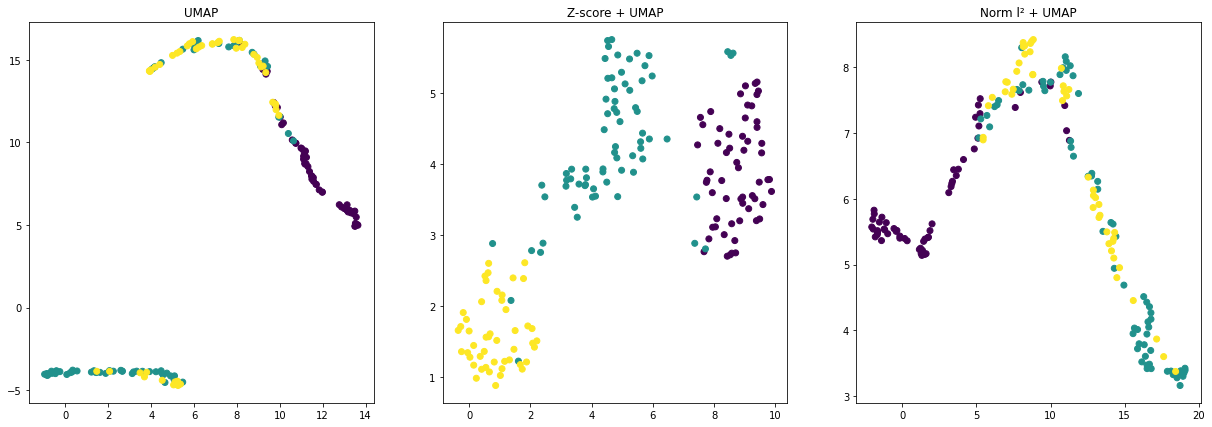

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from umap.umap_ import UMAP

# UMAP
wine_umap = UMAP(n_components=2).fit_transform(wine_X)

# z-score + UMAP
wine_umap_std = make_pipeline(
    StandardScaler(),
    UMAP(n_components=2)).fit_transform(wine_X)

# l2 norm + UMAP
wine_umap_norm = make_pipeline(
    Normalizer(norm="l2"),
    UMAP(n_components=2)).fit_transform(wine_X)

wine_fig, wine_axs = plt.subplots(1, 3)
wine_fig.set_figwidth(21)
wine_fig.set_figheight(7)

wine_axs[0].scatter(
    x=wine_umap[:,0], y=wine_umap[:,1],c=wine_Y
)
wine_axs[0].set_title("UMAP")

wine_axs[1].scatter(
    x=wine_umap_std[:,0],
    y=wine_umap_std[:,1],
    c=wine_Y
)
wine_axs[1].set_title("Z-score + UMAP")

wine_axs[2].scatter(
    x=wine_umap_norm[:,0],
    y=wine_umap_norm[:,1],
    c=wine_Y
)
wine_axs[2].set_title("Norm l² + UMAP")

plt.show()

Por fim, também podemos visualizar em três dimensões o resultado das técnicas de redução de dimensionalidade para se abstrair mais conclusões dos dados.

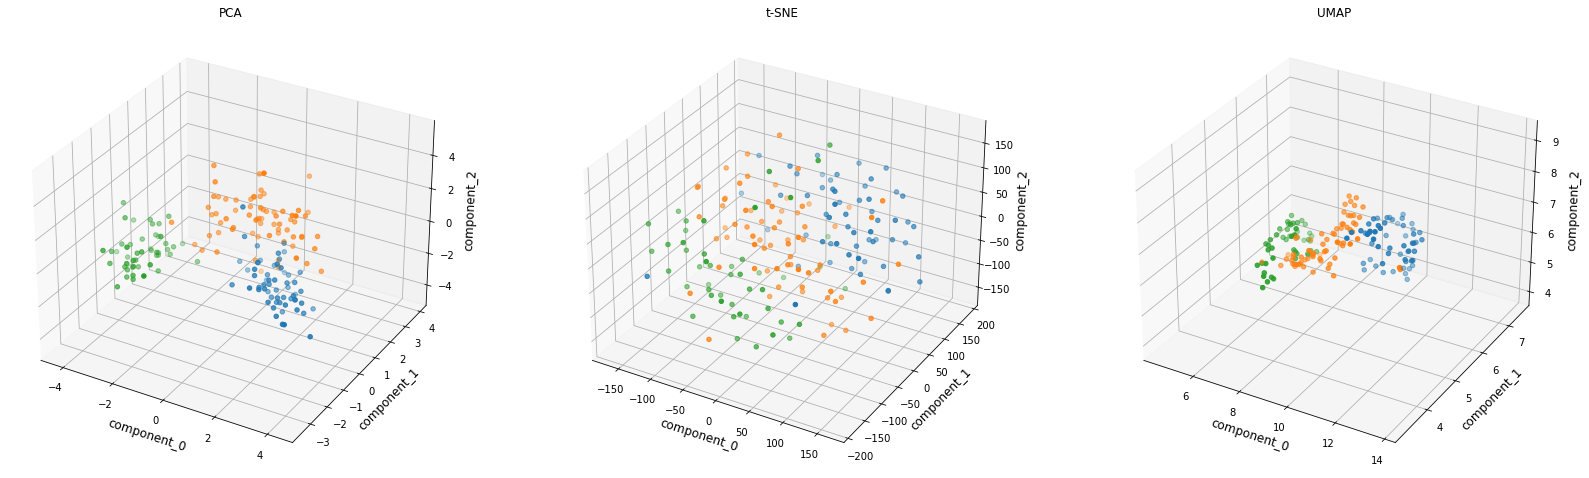

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

# z-score + PCA
wine_pca_std = make_pipeline(
    StandardScaler(),
    PCA(n_components=3)).fit_transform(wine_X)

pca_df = pd.DataFrame(data = wine_pca_std, columns = ['component_%i' % i for i in range(3)])
pca_df = pd.concat([pca_df, wine_Y], axis = 1)

m = pca_df['target']

fig = plt.figure(figsize=(28,28))
ax1 = fig.add_subplot(331, projection='3d')

xs = pca_df['component_0']
ys = pca_df['component_1']
zs = pca_df['component_2']

for s in m.unique():
     ax1.scatter(xs[m == s], ys[m == s], zs[m == s])

ax1.set_xlabel('component_0', fontsize = 12)
ax1.set_ylabel('component_1', fontsize = 12)
ax1.set_zlabel('component_2', fontsize = 12)

ax1.set_title("PCA")

# z-score + t-SNE
wine_tsne_std = make_pipeline(
    StandardScaler(),
    TSNE(n_components=3)).fit_transform(wine_X)

tsne_df = pd.DataFrame(data = wine_tsne_std, columns = ['component_%i' % i for i in range(3)])
tsne_df = pd.concat([tsne_df, wine_Y], axis = 1)

m = tsne_df['target']

ax2 = fig.add_subplot(332, projection='3d')

xs = tsne_df['component_0']
ys = tsne_df['component_1']
zs = tsne_df['component_2']

for s in m.unique():
     ax2.scatter(xs[m == s], ys[m == s], zs[m == s])

ax2.set_xlabel('component_0', fontsize = 12)
ax2.set_ylabel('component_1', fontsize = 12)
ax2.set_zlabel('component_2', fontsize = 12)

ax2.set_title("t-SNE")

# z-score + UMAP
wine_umap_std = make_pipeline(
    StandardScaler(),
    UMAP(n_components=3)).fit_transform(wine_X)

umap_df = pd.DataFrame(data = wine_umap_std, columns = ['component_%i' % i for i in range(3)])
umap_df = pd.concat([umap_df, wine_Y], axis = 1)

m = umap_df['target']

ax3 = fig.add_subplot(333, projection='3d')

xs = umap_df['component_0']
ys = umap_df['component_1']
zs = umap_df['component_2']

for s in m.unique():
     ax3.scatter(xs[m == s], ys[m == s], zs[m == s])

ax3.set_xlabel('component_0', fontsize = 12)
ax3.set_ylabel('component_1', fontsize = 12)
ax3.set_zlabel('component_2', fontsize = 12)

ax3.set_title("UMAP")

plt.show()